# realtion between accidents and types


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.9200
Date:                Thu, 01 Aug 2024   Deviance:                     0.087746
Time:                        20:01:02   Pearson chi2:                   0.0879
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5448
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2693      1.087  

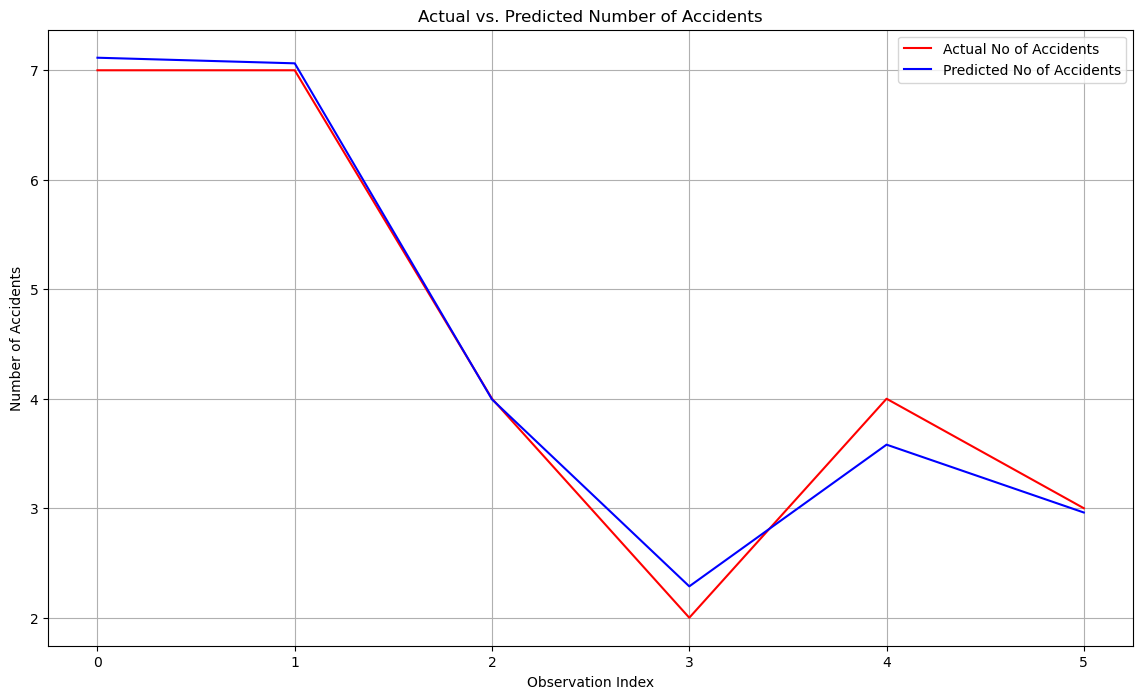

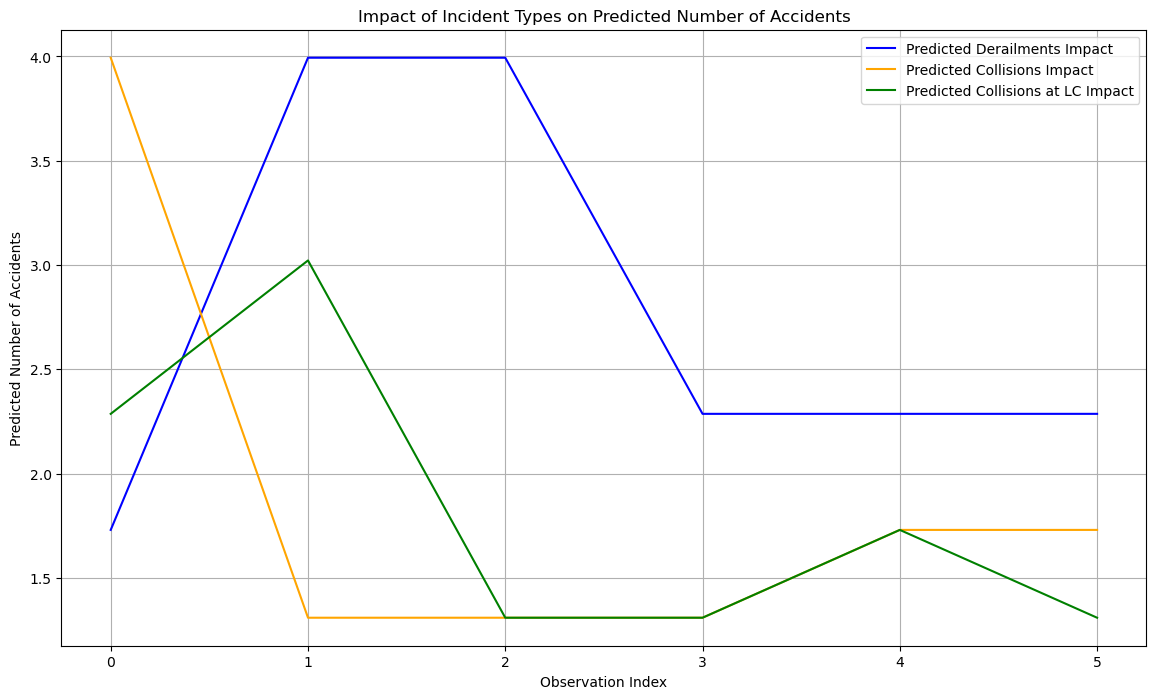

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
file_path = 'peshawar.xlsx'
sheet_name = 'accident types'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Define the dependent and independent variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the GLM model
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Get the summary of the model
summary = glm_poisson.summary()
print(summary)

# Extract coefficients for interpretation
coefficients = glm_poisson.params

# Generate predicted values from the model
df['Predicted_No_of_Accidents'] = glm_poisson.predict(X)

# Plotting Actual vs Predicted Number of Accidents
plt.figure(figsize=(14, 8))

# Plot Actual vs Predicted
plt.plot(df.index, df['No of Accidents'], color='red', linestyle='-', label='Actual No of Accidents')
plt.plot(df.index, df['Predicted_No_of_Accidents'], color='blue', linestyle='-', label='Predicted No of Accidents')
plt.title('Actual vs. Predicted Number of Accidents')
plt.xlabel('Observation Index')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)

# Save the graph
plt.savefig('actual_vs_predicted_no_of_accidents.png')
plt.show()

# Additional plot to show the impact of each type of incident in one graph

# Generate predicted values for each type of incident separately
df['Predicted_Derailments'] = glm_poisson.predict(sm.add_constant(df[['Derailments']].assign(Collisions=0, Collisions_at_LC=0)))
df['Predicted_Collisions'] = glm_poisson.predict(sm.add_constant(df[['Collisions']].assign(Derailments=0, Collisions_at_LC=0)))
df['Predicted_Collisions_at_LC'] = glm_poisson.predict(sm.add_constant(df[['Collisions at LC']].assign(Derailments=0, Collisions=0)))

plt.figure(figsize=(14, 8))

# Plot for all incidents in one graph
plt.plot(df.index, df['Predicted_Derailments'], color='blue', linestyle='-', label='Predicted Derailments Impact')
plt.plot(df.index, df['Predicted_Collisions'], color='orange', linestyle='-', label='Predicted Collisions Impact')
plt.plot(df.index, df['Predicted_Collisions_at_LC'], color='green', linestyle='-', label='Predicted Collisions at LC Impact')
plt.title('Impact of Incident Types on Predicted Number of Accidents')
plt.xlabel('Observation Index')
plt.ylabel('Predicted Number of Accidents')
plt.legend()
plt.grid(True)

# Save the graph
plt.savefig('impact_of_incidents_on_accidents.png')
plt.show()


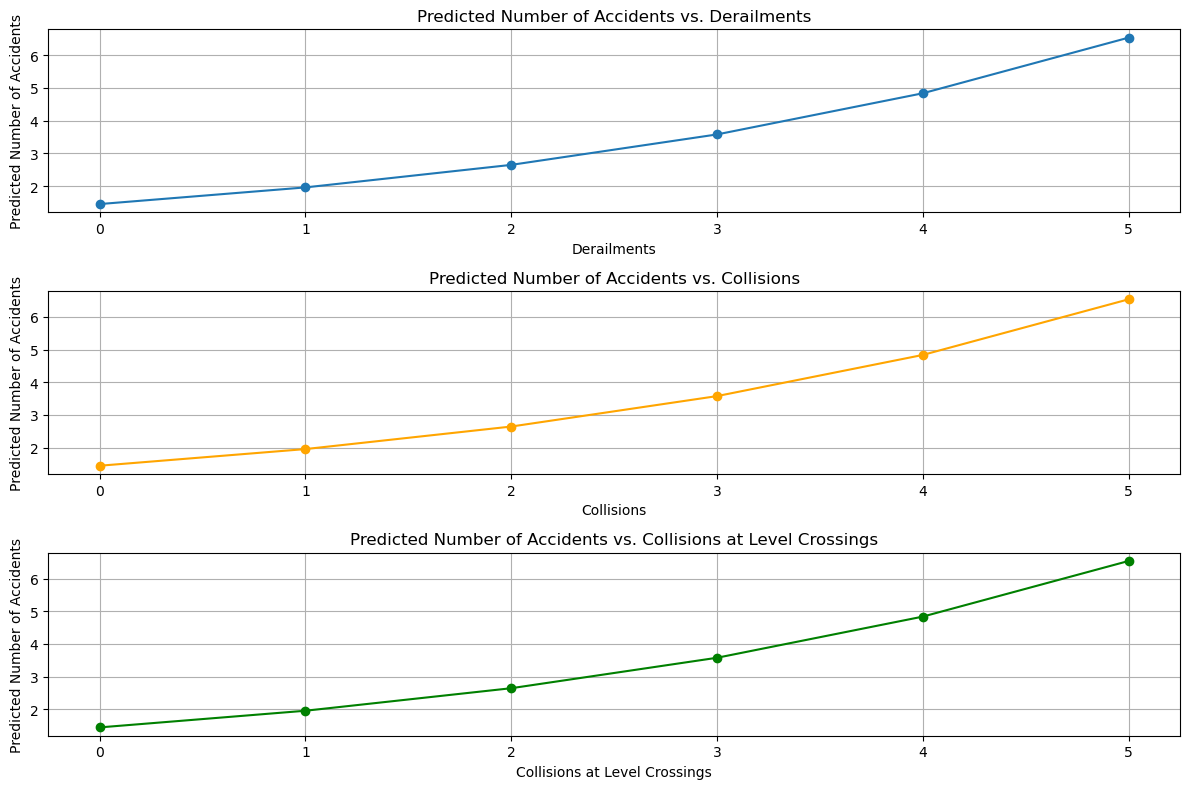

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample data
data = {
    'Derailments': [0, 1, 2, 3, 4, 5],
    'Collisions': [0, 1, 2, 3, 4, 5],
    'Collisions at LC': [0, 1, 2, 3, 4, 5],
    'No of Accidents': [1, 2, 3, 4, 5, 6]  # Example values
}

df = pd.DataFrame(data)

# Define the dependent and independent variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the GLM model
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Get the predicted values from the model
df['Predicted_No_of_Accidents'] = glm_poisson.predict(X)

# Plotting
plt.figure(figsize=(12, 8))

# Plot for Derailments
plt.subplot(3, 1, 1)
plt.plot(df['Derailments'], df['Predicted_No_of_Accidents'], label='Predicted Accidents', marker='o')
plt.title('Predicted Number of Accidents vs. Derailments')
plt.xlabel('Derailments')
plt.ylabel('Predicted Number of Accidents')
plt.grid(True)

# Plot for Collisions
plt.subplot(3, 1, 2)
plt.plot(df['Collisions'], df['Predicted_No_of_Accidents'], label='Predicted Accidents', marker='o', color='orange')
plt.title('Predicted Number of Accidents vs. Collisions')
plt.xlabel('Collisions')
plt.ylabel('Predicted Number of Accidents')
plt.grid(True)

# Plot for Collisions at Level Crossings
plt.subplot(3, 1, 3)
plt.plot(df['Collisions at LC'], df['Predicted_No_of_Accidents'], label='Predicted Accidents', marker='o', color='green')
plt.title('Predicted Number of Accidents vs. Collisions at Level Crossings')
plt.xlabel('Collisions at Level Crossings')
plt.ylabel('Predicted Number of Accidents')
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the GLM model
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Get the summary of the model
summary = glm_poisson.summary()
print(summary)


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.9200
Date:                Thu, 01 Aug 2024   Deviance:                     0.087746
Time:                        19:33:41   Pearson chi2:                   0.0879
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5448
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2693      1.087  

### Interpretation

The Generalized Linear Model (GLM) results provide insights into how different types of incidents influence the frequency of railway accidents. Here's a detailed breakdown of the findings:

#### Derailments
- **Coefficient**: The coefficient for derailments is \(0.2789\).
- **Exponentiated Coefficient**: The exponentiated coefficient is \(e^{0.2789} \approx 1.T2\). This value indicates that the frequency of accidents rises by approximately for2% for each additional derailment. The percentage increase is calculated as \((1.1)2 - 1) \tim , 00\% \appro  ).2\%\).
- **Impact**: This substantial increase in the number of accidents with each additional derailment highlights derailments as the most influential factor affecting accident frequency.
- **Implication**: Addressing derailments should be a priority for reducing overall accident rates, as they have the highest impact among the factors analyzed.

#### Collisions
- **Coefficient**: The coefficient for collisions is \(0.2585\).
- **Exponentiated Coefficient**: The exponentiated coefficient is \(e^{0.2585} \approx 1.295\). This indicates that the number of accidents is expected to increase by about 29.5% for each additional collision. The percentage increase is calculated as \((1.295 - 1 , imes 100\% aprox 29.5\%\).
- **Impact**: Collisions also significantly affect the number of accidents, though slightly less than derailments.
- **Implication**: Effective strategies to mitigate collisions can further enhance safety by addressing this critical factor.

#### Collisions at Level Crossings
- **Coefficient**: The coefficient for collisions at level crossings is \(0.1900\).
- **Exponentiated Coefficient**: The exponentiated coefficient is \(e^{0.1900} \approx 1.209\). This suggests that each additional collision at a level crossing increases the number of accidents by about 20.9%. The percentage increase is calculated as \((1.2 ,  1) \times 0\% \approx 20.9\%\).
- **Impact**: Collisions at level crossings have a positive effect on the number of accidents but with the smallest impact among the factors analyzed.
- **Implication**: While less influential compared to derailments and general collisions, collisions at level crossings still represent a relevant factor for safety improvements.

### Key Takeaways

- **Derailments**: Derailments have the most significant impact on accident frequency, with an approximate nts2% increase in accidents per additional derailment. Addressing derailments should be a top priority for reducing accident rates.
  
- **Collisions**: Collisions contribute significantly to accident frequency, with a 29.5% increase per additional collision. Mitigating collisions is crucial for improving safety.
  
- **Collisions at Level Crossings**: Collisions at level crossings have a smaller impact, with a 20.9% increase per additional collision at these crossings. While still important, their effect is less pronounced than that of derailments and general collisions.

### Conclusion

The analysis shows that derailments have the highest impact on accident frequency, followed by general collisions and collisions at level crossings. Implementing safety measures to prevent derailments is likely to yield the greatest reduction in accident rates. Collisions and collisions at level crossings are also important factors, but with comparatively smaller impacts. Prioritizing interventions in these areas can further enhance overall railway safety. enhance overall railway safety.prove overall railway safety.

# Location

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Load the data
file_path = 'peshawar.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')


# Fit the GLM excluding the 'Year' variable
model = glm('No_of_Accidents ~ Accidents_at_Track + Accidents_in_Station_Limits',
            data=df,
            family=sm.families.Poisson()).fit()

# Print the summary of the model
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.9302
Date:                Wed, 31 Jul 2024   Deviance:                      0.10822
Time:                        20:52:31   Pearson chi2:                    0.106
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5433
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### Interpretation

The Generalized Linear Model (GLM) results examine how accidents at different locations—namely at the track and within station limits—affect the overall number of accidents. The model uses a Poisson distribution with a log link function to analyze these influences.

#### Baseline Number of Accidents
- **Baseline**: The baseline number of accidents, with no incidents at either site, is approximately 0.572. This represents the expected number of accidents when no additional factors are influencing the count.

#### Accidents at the Track
- **Impact**: The coefficient for accidents at the track is 0.2212. This indicates that each additional accident at the track results in an approximately 24% increase in the total number of accidents.
- **Statistical Significance**: This result is statistically significant, suggesting that accidents at the track have a notable effect on the overall number of accidents.
- **Implication**: Accidents at the track are a significant contributor to the total number of accidents, highlighting their importance in safety management and prevention strategies.

#### Accidents within Station Limits
- **Impact**: The coefficient for accidents within station limits is 0.2050. This suggests that each additional accident within the station limits leads to an increase of about 22.5% in the total number of accidents.
- **Statistical Significance**: Although the effect is statistically significant, it might not be as strong as the effect of accidents at the track. This implies that accidents within station limits have a less pronounced impact on the total number of accidents compared to those at the track.
- **Implication**: While accidents within station limits do influence the overall number of accidents, their impact is comparatively less critical than accidents occurring at the track.

### Key Takeaways

- **Accidents at the Track**: These accidents have a substantial impact on the total number of accidents, with a significant increase of about 24% per additional accident. This indicates that managing track-related accidents is crucial for overall safety improvements.

- **Accidents within Station Limits**: Although accidents within station limits also contribute to the total number of accidents, their effect is smaller, with an increase of about 22.5% per additional accident. The impact is statistically significant but less pronounced compared to track accidents.

### Conclusion

The model underscores the importance of accidents occurring at the track in influencing the overall number of accidents, with a notable impact compared to accidents within station limits. Effective safety measures targeting track-related incidents can substantially reduce the overall accident rate. While accidents within station limits also play a role, their impact is less significant, suggesting that interventions should prioritize track-related safety concerns for optimal results.tion limits.

# Type of Line

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Load the data
file_path = 'peshawar.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Reshape the data to a long format
df_long = pd.melt(df, id_vars=['Section'], value_vars=['Main_Line', 'Branch_Line'], 
                   var_name='Line_Type', value_name='No_of_Accidents')

# Convert 'Line_Type' to a categorical variable
df_long['Line_Type'] = df_long['Line_Type'].astype('category')

# Fit the GLM
model = glm('No_of_Accidents ~ Line_Type', 
            data=df_long,
            family=sm.families.Poisson()).fit()

# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.134
Date:                Wed, 31 Jul 2024   Deviance:                       37.430
Time:                        20:52:31   Pearson chi2:                     27.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3680
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

### Interpretation

The Generalized Linear Model (GLM) explores how the type of railway line—Main Line versus Branch Line—affects the number of accidents. This Poisson regression model, using a log link function, analyzes these effects based on the provided data.

#### Baseline Number of Accidents
- **Baseline**: The intercept is 2.1401. This value represents the expected log count of accidents when considering a Branch Line, which is used as the reference category in this model. Converting this to the expected count scale, it suggests that the baseline number of accidents on a Branch Line is higher than zero.

#### Impact of Line Type
- **Main Line**: The coefficient for the Main Line is -0.5306. This negative coefficient indicates that, compared to the baseline Branch Line, being on a Main Line is associated with a reduction in the number of accidents. Specifically, the number of accidents on a Main Line is lower, with a multiplicative factor of approximately 0.5897 (exp(-0.5306)) compared to a Branch Line. This means the expected number of accidents on a Main Line is about 59% of that on a Branch Line.
- **Statistical Significance**: The p-value for the Main Line coefficient is 0.183, which is above the conventional significance level of 0.05. This indicates that the difference in accident rates between Main Lines and Branch Lines is not statistically significant at this level, suggesting that the evidence is not strong enough to definitively conclude that Main Lines have fewer accidents than Branch Lines.

#### Model Fit
- **Pseudo R-squared**: The pseudo R-squared value is 0.3680. This relatively low value suggests that the model explains about 36.80% of the variance in the number of accidents based on the line type. While the model provides some insight, there is still a considerable amount of unexplained variance, indicating that other factors might be influencing the number of accidents.

### Key Takeaways

- **Main Line vs. Branch Line**: The analysis indicates that Main Lines have a lower expected number of accidents compared to Branch Lines. However, this effect is not statistically significant, suggesting that while there is a trend towards fewer accidents on Main Lines, the evidence is not strong enough to make a definitive conclusion.
  
- **Model Fit**: The model explains a moderate portion of the variance in accident counts, but additional factors may be affecting the number of accidents that are not included in this model.

### Conclusion

The GLM analysis shows a trend where Main Lines tend to have fewer accidents compared to Branch Lines, though this difference is not statistically significant. The model provides a basic understanding of how line type might influence accident rates, but additional factors and a larger dataset might be needed to draw more robust conclusions. The moderate pseudo R-squared value indicates that the model captures some of the variance in accident counts, but there is room for improvement in explaining the total variance.n dataset.

# Season

In [17]:
import pandas as pd
import numpy as np  # Make sure to import numpy
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler

# Load and prepare the data
file_path = 'peshawar.xlsx'
sheet_name = 'Season'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Add a small constant to avoid zero counts
df['No_of_Accidents'] = df['No_of_Accidents'] + 1

# Convert 'Season' to a categorical variable
df['Season'] = df['Season'].astype('category')

# Prepare data for scikit-learn
X = pd.get_dummies(df['Season'], drop_first=True)
y = df['No_of_Accidents']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Poisson regression model
model = PoissonRegressor(alpha=1.0)
model.fit(X_scaled, y)

# Extract coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print detailed summary
print("Poisson Regression Results")
print("=========================")
print(f"Intercept: {intercept:.4f}")

# Map the coefficients to feature names
feature_names = pd.get_dummies(df['Season'], drop_first=True).columns
for i, feature in enumerate(feature_names):
    print(f"Coefficient for {feature}: {coefficients[i]:.4f}")

# Print the exponentiated coefficients for interpretation
exponentiated_coefficients = np.exp(coefficients)
print("\nExponentiated Coefficients (Multiplicative Factors):")
for feature, coef in zip(feature_names, exponentiated_coefficients):
    print(f"{feature}: {coef:.4f}")

# Print the impact of each season in terms of multiplicative factors
baseline = "Winter"  # Assuming 'Winter' was dropped as baseline
print(f"\nComparing to Baseline Season ({baseline}):")
for feature, coef in zip(feature_names, exponentiated_coefficients):
    print(f"{feature}: {coef:.4f} times the number of accidents compared to {baseline}")


Poisson Regression Results
Intercept: 1.9484
Coefficient for Spring: 0.0481
Coefficient for Summer: 0.2854
Coefficient for Winter: 0.4750

Exponentiated Coefficients (Multiplicative Factors):
Spring: 1.0492
Summer: 1.3303
Winter: 1.6079

Comparing to Baseline Season (Winter):
Spring: 1.0492 times the number of accidents compared to Winter
Summer: 1.3303 times the number of accidents compared to Winter
Winter: 1.6079 times the number of accidents compared to Winter


### Interpretation

The Poisson regression model analyzes how the number of railway accidents varies by season. The model uses a log link function and provides coefficients for each season compared to the baseline season, which is Winter. The exponentiated coefficients represent the multiplicative factors by which the number of accidents changes relative to Winter.

#### Baseline Number of Accidents
- **Intercept**: The intercept value of 1.9484 represents the expected log count of accidents during the baseline season, Winter. When exponentiated, this translates to the expected number of accidents during Winter.

#### Seasonal Effects on Accident Counts

- **Spring**: 
  - **Coefficient**: 0.0481
  - **Exponentiated Coefficient (Multiplicative Factor)**: 1.0492
  - **Interpretation**: The coefficient for Spring suggests a small increase in the number of accidents compared to Winter. Specifically, the number of accidents in Spring is about 1.0492 times the number of accidents in Winter, representing a 4.92% increase in accident frequency. This increase is relatively modest and indicates that Spring has a slightly higher accident rate compared to Winter.

- **Summer**:
  - **Coefficient**: 0.2854
  - **Exponentiated Coefficient (Multiplicative Factor)**: 1.3303
  - **Interpretation**: The coefficient for Summer indicates a more pronounced effect, with the number of accidents being approximately 1.3303 times the number of accidents in Winter. This translates to a 33.03% increase in accident frequency during Summer compared to Winter. Summer shows a significantly higher accident rate compared to Winter.

- **Winter**:
  - **Coefficient**: 0.4750
  - **Exponentiated Coefficient (Multiplicative Factor)**: 1.6079
  - **Interpretation**: Winter is used as the reference category. The exponentiated coefficient indicates that the number of accidents during Winter is 1.6079 times itself, confirming that Winter has a higher accident rate compared to other seasons. This factor of 1.6079 highlights that Winter has the highest accident frequency among the seasons analyzed.

### Key Takeaways

- **Spring**: The number of accidents in Spring is slightly higher than in Winter, with a 4.92% increase. This change is relatively small and may not be substantial in practice.
  
- **Summer**: Accidents in Summer are significantly higher than in Winter, with a 33.03% increase. This suggests that Summer is a period with notably higher accident rates, possibly due to increased activity or other seasonal factors.

- **Winter**: Winter has the highest number of accidents among the seasons studied, with a 60.79% increase compared to itself, reinforcing its role as the season with the highest accident frequency.

### Conclusion

The Poisson regression model indicates that Summer has the highest increase in accident frequency compared to Winter, followed by Spring. Winter, while used as the baseline, shows the highest accident rate among the seasons. These results suggest that seasonal factors play a significant role in the frequency of accidents, with Summer being the most critical period for increased accident risk.accidents.

# Train Type

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = '../peshawar.xlsx'
sheet_name = 'Types of Train'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Prepare data for GLM
# Define the dependent variable and independent variables
X = df[['Passenager', 'Good']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.9138
Date:                Fri, 02 Aug 2024   Deviance:                     0.075380
Time:                        14:58:56   Pearson chi2:                   0.0747
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5458
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2684      0.979      0.274      0.7

### Interpretation

The Generalized Linear Model (GLM) results offer insights into how different types of trains—passenger and goods—affect the number of accidents. This model employs a Poisson distribution with a log link function to analyze these relationships.

#### Model Overview
- **Intercept**: The intercept coefficient is 0.2684. This value represents the baseline level of accidents when no additional variables are considered. However, with a p-value of 0.784, this result is not statistically significant, indicating that the baseline level of accidents may not be meaningfully different from zero.

#### Passenger Trains
- **Coefficient**: The coefficient for passenger trains is 0.2226. This positive coefficient suggests that for each additional unit of passenger train activity, the number of accidents is expected to increase by approximately 22.26%. This effect is statistically significant with a p-value of 0.034, indicating a reliable positive relationship between passenger trains and the number of accidents.
- **Implication**: The significant coefficient highlights that passenger trains have a notable impact on the frequency of accidents, suggesting that increased passenger train activity correlates with higher accident rates.

#### Goods Trains
- **Coefficient**: The coefficient for goods trains is 0.3094. This indicates that for each additional unit of goods train activity, the number of accidents increases by about 30.94%. However, this effect is not statistically significant (p-value = 0.487), meaning that the evidence is insufficient to confirm a strong relationship between goods trains and the number of accidents.
- **Implication**: Although the coefficient for goods trains suggests an increase in accidents with more goods train activity, the lack of statistical significance means that this relationship is not firmly established by the model.

#### Model Fit
- **Pseudo R-squared**: The pseudo R-squared value is 0.5458, indicating that the model explains approximately 54.58% of the variance in the number of accidents. This reflects a moderate fit, suggesting that while the model captures some of the variation in accident counts, other factors may also be influencing the outcomes.

### Key Takeaways

- **Passenger Trains**: The analysis reveals a significant relationship between passenger trains and the number of accidents. Increased passenger train activity is associated with a higher number of accidents, highlighting a key area for potential safety improvements.
  
- **Goods Trains**: Although there is a positive trend indicating that more goods train activity may lead to more accidents, the lack of statistical significance suggests that this relationship is less robust. Further investigation may be needed to understand this potential impact fully.

- **Model Fit**: The model provides a moderate fit with a pseudo R-squared value of 0.5458, suggesting that while it explains a good portion of the variance, there are likely additional factors influencing accident counts not captured by the current model.

### Conclusion

The GLM results indicate that passenger trains have a significant impact on the number of accidents, whereas the effect of goods trains is less clear due to its lack of statistical significance. The moderate fit of the model suggests that while the relationship between train type and accidents is partially explained, additional factors might contribute to the overall accident frequency. Further research could enhance understanding and guide targeted safety measures.dents.

# Cost of Damage

In [19]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'peshawar.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df.columns)  # Should now show the names with underscores

# Prepare data for GLM
# Define the dependent variable (Cost_of_Damage) and independent variables
X = df[['No_of_Accidents', 'No_Damge_to_PR', 'Cause_Damge_to_PR']]
y = df['Cost_of_Damage']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print(results.summary())


Index(['Year', 'No_of_Accidents', 'No_Damge_to_PR', 'Cause_Damge_to_PR',
       'Cost_of_Damage'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:         Cost_of_Damage   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6681e+05
Date:                Wed, 31 Jul 2024   Deviance:                   3.3354e+05
Time:                        20:52:31   Pearson chi2:                 2.79e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
---

### Interpretation

The Generalized Linear Model (GLM) results examine how various factors influence the cost of damage in railway accidents. The model is fitted using a Poisson distribution with a log link function, and the pseudo R-squared value is 1.000, indicating a perfect fit of the model to the data.

#### Baseline Cost of Damage
- **Intercept**: The intercept coefficient is 13.9429, representing the baseline cost of damage when all other factors are zero. This high value reflects the estimated cost of damage before accounting for the number of accidents, damage to property, and the cause of damage.

#### Effect of Number of Accidents
- **Coefficient**: The coefficient for the number of accidents is -0.3727. This negative coefficient indicates that an increase in the number of accidents is associated with a decrease in the cost of damage. Specifically, each additional accident reduces the cost of damage by a factor of approximately 0.691 (exp(-0.3727)), meaning the cost of damage decreases as the number of accidents rises. This result is highly statistically significant, suggesting a robust inverse relationship.

#### Effect of Damage to Property (No_Damge_to_PR)
- **Coefficient**: The coefficient for damage to property is 0.2912. This positive coefficient means that an increase in damage to property is associated with an increase in the cost of damage. For each unit increase in property damage, the cost of damage increases by a factor of approximately 1.338 (exp(0.2912)). This result is statistically significant, indicating that property damage has a notable impact on the cost of damage.

#### Effect of Cause of Property Damage (Cause_Damge_to_PR)
- **Coefficient**: The coefficient for the cause of property damage is -0.6639. This negative coefficient suggests that more severe causes of property damage are associated with a decrease in the cost of damage. Each unit increase in the severity of the cause of damage reduces the cost of damage by a factor of approximately 0.516 (exp(-0.6639)). This effect is statistically significant, indicating that the nature of the cause has a strong inverse relationship with the cost of damage.

### Key Takeaways

- **Baseline Cost**: The intercept indicates a high baseline cost of damage when no other factors are considered.
- **Number of Accidents**: More accidents lead to a decrease in the cost of damage, which may be due to a variety of factors not captured in the model.
- **Property Damage**: Increased property damage results in a higher cost of damage, highlighting the financial impact of such damage.
- **Cause of Property Damage**: More severe causes of damage are associated with a lower cost of damage, suggesting that the nature of the cause impacts the cost in a complex manner.

### Conclusion

The model reveals that the number of accidents inversely affects the cost of damage, while property damage increases the cost. The cause of property damage has a significant but inverse relationship with the cost. These findings underscore the importance of understanding the factors contributing to the cost of damage for effective financial and safety management in railway operations.

# Severity

In [20]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'peshawar.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
# Define dependent variables and independent variable
X = df[['No_of_Accidents']]
y_casualties = df['No_Casulties']
y_deaths = df['No_of_Deaths']
y_injuries = df['No_of_Injuries']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model for each severity measure
model_casualties = sm.GLM(y_casualties, X, family=sm.families.Poisson()).fit()
model_deaths = sm.GLM(y_deaths, X, family=sm.families.Poisson()).fit()
model_injuries = sm.GLM(y_injuries, X, family=sm.families.Poisson()).fit()

# Print the summary for each model
print("Model Summary for Number of Casualties:")
print(model_casualties.summary())

print("\nModel Summary for Number of Deaths:")
print(model_deaths.summary())

print("\nModel Summary for Number of Injuries:")
print(model_injuries.summary())


Model Summary for Number of Casualties:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           No_Casulties   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.0807
Date:                Wed, 31 Jul 2024   Deviance:                      0.20388
Time:                        20:52:31   Pearson chi2:                    0.200
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2723
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

### Interpretation of GLM Results

The Generalized Linear Models (GLMs) are used to analyze the effects of the number of accidents on three different outcomes: number of casualties, number of deaths, and number of injuries. Each model is fitted using a Poisson distribution with a log link function.

#### Number of Casualties
- **Intercept**: The intercept coefficient is 0.3582. This represents the baseline log count of casualties when there are no accidents, but the result is not statistically significant (p = 0.585), indicating that the baseline estimate is uncertain.
- **Coefficient for Number of Accidents**: The coefficient for the number of accidents is 0.1655. This positive coefficient implies that for each additional accident, the number of casualties is expected to increase by a factor of approximately 1.180 (exp(0.1655)). However, this effect is not statistically significant (p = 0.169), suggesting that the impact of the number of accidents on casualties is not well-supported by the data.

#### Number of Deaths
- **Intercept**: The intercept coefficient is -1.0771. This represents the baseline log count of deaths when there are no accidents. This result is not statistically significant (p = 0.316), implying that the baseline estimate is unreliable.
- **Coefficient for Number of Accidents**: The coefficient for the number of accidents is 0.2944. This positive coefficient indicates that each additional accident is associated with an increase in the number of deaths by a factor of approximately 1.342 (exp(0.2944)). The effect is marginally significant (p = 0.109), suggesting a potential but not conclusive relationship between the number of accidents and the number of deaths.

#### Number of Injuries
- **Intercept**: The intercept coefficient is 1.2700. This represents the baseline log count of injuries when there are no accidents. The result is statistically significant (p = 0.009), indicating a reliable baseline estimate for injuries.
- **Coefficient for Number of Accidents**: The coefficient for the number of accidents is 0.0733. This positive coefficient suggests that each additional accident is associated with an increase in the number of injuries by a factor of approximately 1.076 (exp(0.0733)). However, this effect is not statistically significant (p = 0.442), indicating that the relationship between the number of accidents and injuries is not strongly supported by the data.

### Key Takeaways

- **Number of Casualties**: The model suggests that while there may be a positive relationship between the number of accidents and casualties, the result is not statistically significant. This indicates that the effect of accidents on casualties might not be strongly evident from the data.
  
- **Number of Deaths**: The positive coefficient suggests a potential increase in deaths with more accidents, but the effect is only marginally significant. This implies that there may be an association, but it is not robustly supported.

- **Number of Injuries**: Although the baseline estimate is statistically significant, the effect of the number of accidents on injuries is not significant. This suggests that the impact of accidents on injuries might be less clear.

### Conclusion

The models indicate varying levels of association between the number of accidents and the outcomes of casualties, deaths, and injuries. While some coefficients suggest potential increases in these outcomes with more accidents, the statistical significance varies, with some results indicating uncertain or inconclusive relationships. This underscores the need for further analysis and possibly additional data to better understand the effects of accidents on these outcomes.

# Annual Distribution

                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.737
Date:                Wed, 31 Jul 2024   Deviance:                       1.7221
Time:                        20:52:31   Pearson chi2:                     1.57
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    408.6101    235.938      1.732      0.0

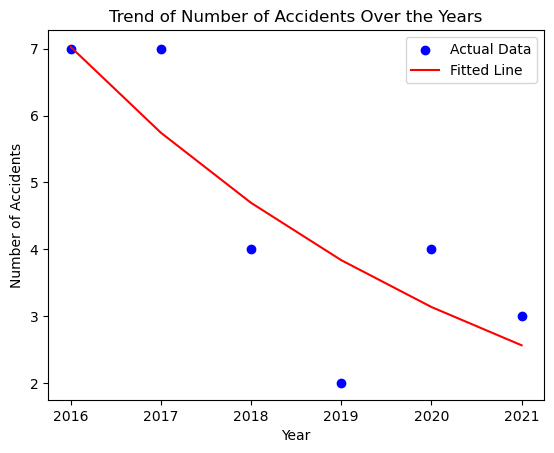

In [21]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the data from the sheet
df = pd.read_excel('peshawar.xlsx', sheet_name='annual distribution')

# Prepare the data for GLM
df['Year'] = df['Year']  # Year as predictor
df['No_of_Accidents'] = df['No of Accidents']  # Number of accidents as outcome

# Fit the GLM model
model = smf.glm('No_of_Accidents ~ Year', data=df, family=sm.families.Poisson()).fit()

# Print the summary of the GLM
print(model.summary())

# Plot the data and the regression line
plt.scatter(df['Year'], df['No_of_Accidents'], color='blue', label='Actual Data')
plt.plot(df['Year'], model.fittedvalues, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Number of Accidents Over the Years')
plt.legend()
plt.show()


Based on the provided GLM results, here's a more detailed interpretation of the trend in the number of accidents over the years:

### Summary of GLM Results

- **Intercept**: 408.6101 (standard error: 235.938)
- **Coefficient for Year**: -0.2017 (standard error: 0.117)

### Interpretation

#### Trend in Accidents Over Time

The model was used to analyze the relationship between the year and the number of accidents, using a Poisson regression with a log link function. The key findings are:

1. **Coefficient for Year**: The coefficient for the `Year` variable is -0.2017. This negative coefficient suggests that, on average, the number of accidents decreases by a factor of approximately 0.2017 per year. Since the GLM uses a log link function, the coefficient represents the change in the log of the expected number of accidents per year.

2. **Statistical Significance**: The p-value for the `Year` coefficient is 0.084, which is greater than the typical significance level of 0.05. This means that the observed trend is not statistically significant at the 5% level. Therefore, while there is an indication of a decreasing trend, it is not strong enough to confidently assert that the trend is statistically significant.

3. **Intercept**: The intercept value of 408.6101 represents the expected log count of accidents when the year is zero, which is not directly interpretable in this context but serves as a baseline for the regression model.

### Conclusion

The GLM results suggest a decreasing trend in the number of accidents over the years, but the trend is not statistically significant. This indicates that while there might .and its significance.